Linear regression predicts the outcome using this formula:

$$ p=\mathbf{x}^{\intercal}\mathbf{\theta}, p \in \mathbb{R} $$

The subject of learning is to pick $\mathbf{\theta}$ that minimizes:

$$ J(\mathbf{\theta}) = \frac{1}{2}|\mathbf{X}\mathbf{\theta} - \mathbf{y}|_2^2 $$

Let's find derivative of the function:

$$ \frac{d}{d\mathbf{\theta}}J(\mathbf{\theta})=\mathbf{X}^{\intercal}(\mathbf{X}\mathbf{\theta} - \mathbf{y}) $$

Function is *convex*, global minimum is when slope is 0:

$$ \mathbf{X}^{\intercal}(\mathbf{X}\mathbf{\theta} - \mathbf{y}) = 0  $$

$$ \mathbf{X}^{\intercal}\mathbf{X}\mathbf{\theta} - \mathbf{X}^{\intercal}\mathbf{y} = 0  $$

$$ \mathbf{X}^{\intercal}\mathbf{X}\mathbf{\theta} = \mathbf{X}^{\intercal}\mathbf{y}  $$

$$ \mathbf{\theta} = (\mathbf{X}^{\intercal}\mathbf{X})^{-1}\mathbf{X}^{\intercal}\mathbf{y} $$

Last piece is called *normal equation*.


In [176]:
import numpy as np
import matplotlib.pyplot as plt


def learn_normal(X: np.ndarray, y: np.ndarray):
    Xb = np.column_stack([np.ones([X.shape[0], 1]), X])

    return np.linalg.inv(Xb.transpose().dot(Xb)).dot(Xb.transpose()).dot(y)


def learn_bgd(X: np.ndarray, y: np.ndarray, total_epoches=10, lr=1):
    Xb = np.column_stack([np.ones([X.shape[0], 1]), X])

    theta = np.ones(Xb.shape[1])
    history = []
    for epoch in range(0, total_epoches):
        history.append(cost(predict(X, theta), y))

        theta = theta - lr * (Xb.transpose().dot(Xb.dot(theta) - y))

    return theta, history


def cost(hx: np.ndarray, y: np.ndarray):
    return np.inner(hx - y, hx - y) * 1 / (2 * hx.shape[0])


def predict(X: np.ndarray, theta: np.ndarray):
    Xb = np.column_stack([np.ones([X.shape[0], 1]), X])

    return Xb.dot(theta)


In [177]:
import sklearn.datasets as datasets

np.random.seed(42)
X, y = datasets.make_regression(10, 1, noise=3)

theta = learn_normal(X, y)

cost(predict(X, theta), y)

5.031982614660054

5.0663984786216245

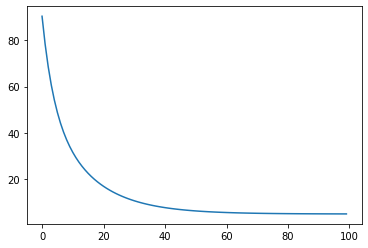

In [178]:
theta, history = learn_bgd(X, y, total_epoches=100, lr=0.01)

plt.plot(np.arange(0, len(history)), history)

cost(predict(X, theta), y)

Let's add extra features to make final equation to be polynomial

In [179]:
def extend(X: np.array):
    return np.column_stack([X, np.power(X, 2)])


theta, history = learn_bgd(extend(X), y, total_epoches=100, lr=0.01)

cost(predict(extend(X), theta), y)

3.9849400429711395